In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [15]:
data = pd.read_csv("C:\\Users\\LENOVO\\Downloads\\climate_change_indicators (2).csv")

In [16]:
data.head()

,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
0,1,"Afghanistan, Islamic Rep. of",AF,AFG,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.281,0.456,1.093,1.555,1.540,1.544,0.910,0.498,1.327,2.012
1,2,Albania,AL,ALB,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.333,1.198,1.569,1.464,1.121,2.028,1.675,1.498,1.536,1.518
2,3,Algeria,DZ,DZA,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.192,1.690,1.121,1.757,1.512,1.210,1.115,1.926,2.330,1.688
3,4,American Samoa,AS,ASM,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.257,1.170,1.009,1.539,1.435,1.189,1.539,1.430,1.268,1.256
4,5,"Andorra, Principality of",AD,AND,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,0.831,1.946,1.690,1.990,1.925,1.919,1.964,2.562,1.533,3.243


In [17]:
data.shape

(225, 72)

In [18]:
data.isna().any()

ObjectId     False
Country      False
ISO2          True
ISO3         False
Indicator    False
             ...  
F2018         True
F2019         True
F2020         True
F2021         True
F2022         True
Length: 72, dtype: bool

In [19]:
valores_faltantes = data.iloc[:, :10].isnull().sum()
valores_faltantes

ObjectId               0
Country                0
ISO2                   2
ISO3                   0
Indicator              0
Unit                   0
Source                 0
CTS_Code               0
CTS_Name               0
CTS_Full_Descriptor    0
dtype: int64

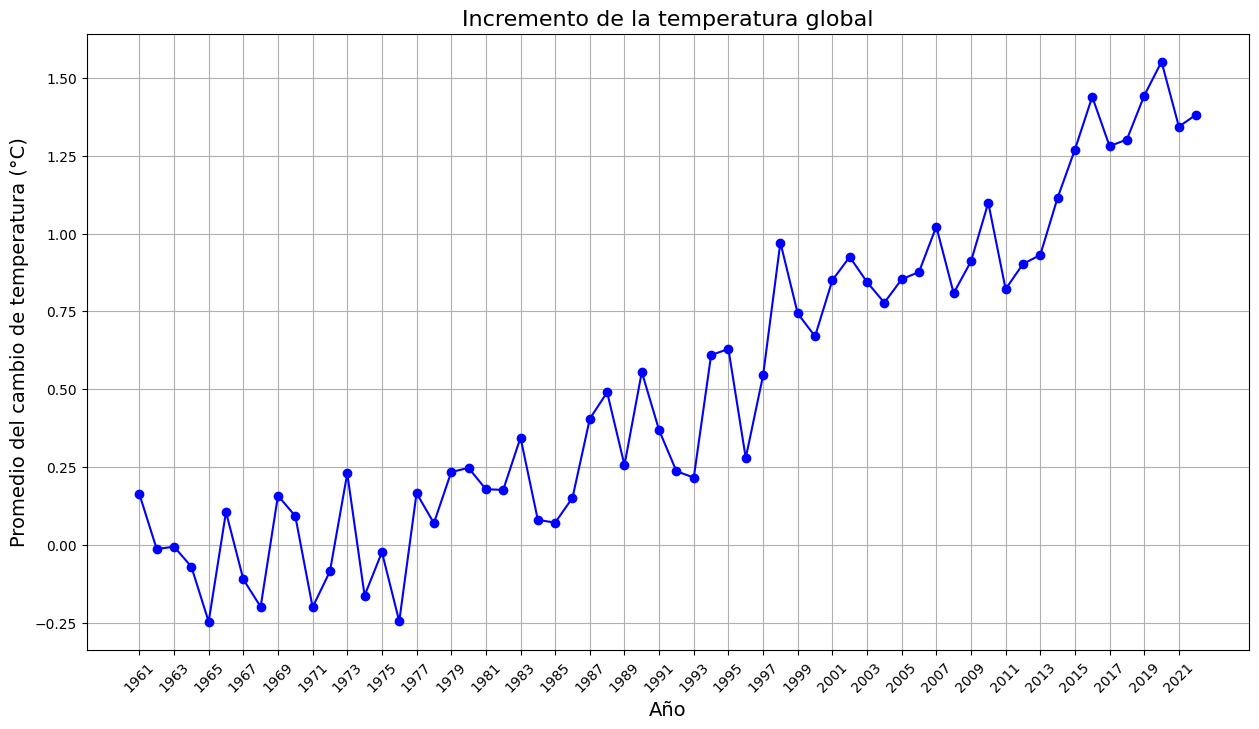

In [20]:
year = [column for column in data.columns if column.startswith('F')]
avg_temp_change = data[year].mean()
data.rename(columns=lambda x: x[1:] if x.startswith('F') and x[1:].isdigit() else x, inplace=True)
# data
num_years = []
for col in data.columns:
    if col.isdigit():
        num_years.append(col)

plt.figure(figsize=(15,8))
plt.plot(num_years, avg_temp_change, marker='o', linestyle='-', color='b')
plt.title('Incremento de la temperatura global', fontsize=16)
plt.xlabel('Año', fontsize=14)
plt.ylabel('Promedio del cambio de temperatura (°C)', fontsize=14)
plt.xticks(num_years[::2], rotation=45)  #Muestra el cambio cada dos anios 
plt.grid(True)
plt.show()

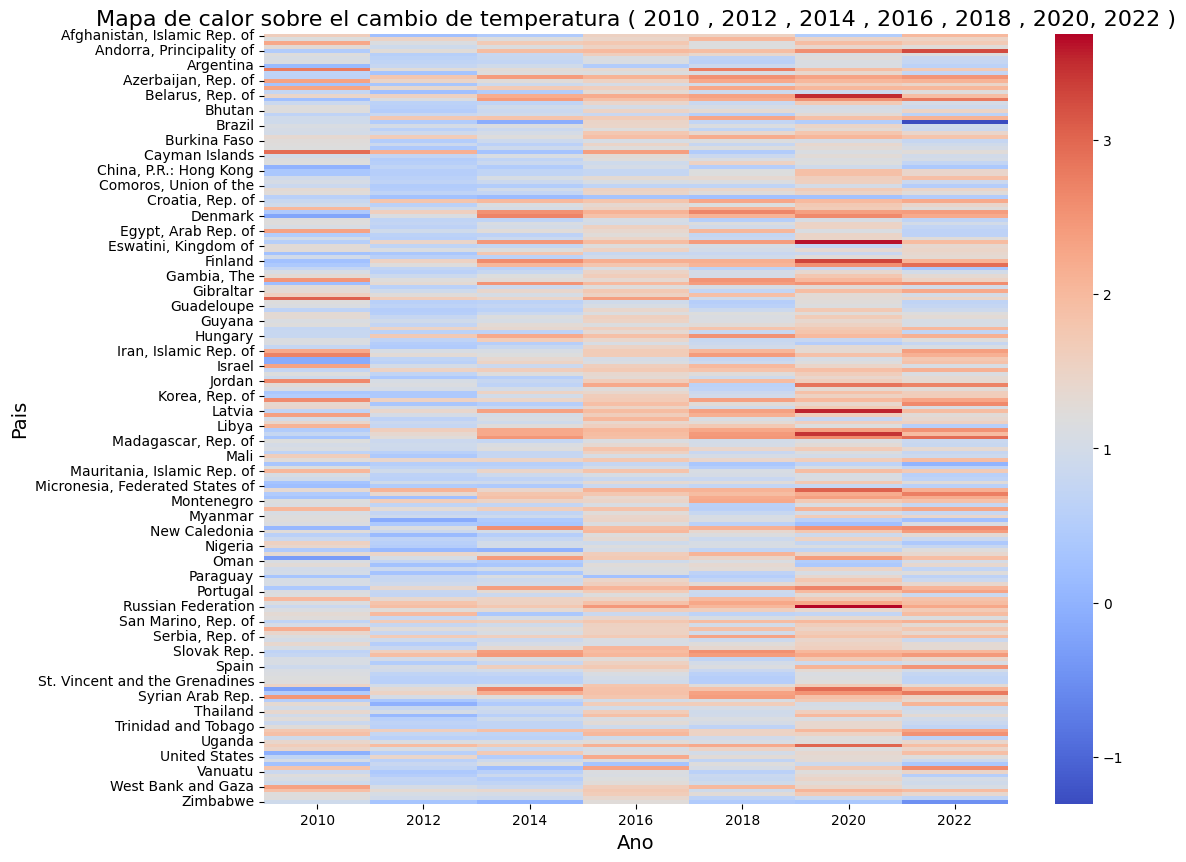

In [21]:
check_years = ['2010','2012','2014','2016','2018','2020','2022']
heatmap_data = data.set_index('Country')[check_years].dropna() #Eliminamos paises con valores faltantes

plt.figure(figsize=(12,10))
sns.heatmap(heatmap_data, cmap='coolwarm')
plt.title('Mapa de calor sobre el cambio de temperatura ( 2010 , 2012 , 2014 , 2016 , 2018 , 2020, 2022 )',fontsize=16)
plt.xlabel('Ano', fontsize=14)
plt.ylabel('Pais', fontsize=14)
plt.show()

In [22]:
df_melt = pd.melt(data, id_vars=['Country'], value_vars = num_years)
df_melt.rename(columns={'variable':'Year', 'value':'Tempurate_Change'}, inplace = True)
df_melt['Year'] = df_melt['Year'].astype(int)


In [23]:
top_countries_year = df_melt.groupby(["Year", "Country"])["Tempurate_Change"].mean().reset_index()
top_countries_year = top_countries_year.groupby("Year").apply(lambda x: x.nlargest(1, "Tempurate_Change")).reset_index(drop=True)
top_countries_year = top_countries_year[top_countries_year["Year"] > 1999]

In [11]:
top_countries_year = df_melt.groupby(["Year", "Country"])["Tempurate_Change"].mean().reset_index()
top_countries_year = top_countries_year.groupby("Year").apply(lambda x: x.nlargest(1, "Tempurate_Change")).reset_index(drop=True)
top_countries_year = top_countries_year[top_countries_year["Year"] > 1999]

In [24]:
fig = px.bar(top_countries_year.sort_values("Year", ascending=False), x='Year', y='Tempurate_Change', color='Tempurate_Change',
              color_continuous_scale = 'orrd', title='The country with the maximum temperature change for each year', text="Country",
              labels={'Tempurate_Change': 'Tempuarete Cahnge (°C)'})

fig.update_layout(
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=False),
    plot_bgcolor='rgba(0,0,0,0)', 
)
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [25]:
fig_bar = px.bar(df_melt.sort_values("Tempurate_Change", ascending = False).head(10), x='Country',
                 y='Tempurate_Change', color='Tempurate_Change', color_continuous_scale = 'orrd',
                 title='Countries With The Highest Temperature Increase (Top 10)', text="Country",
                 labels={'Tempurate_Change': 'Tempurate Change (°C)'})

fig_bar.update_layout(
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=False),
    plot_bgcolor='rgba(0,0,0,0)'
)
fig_bar.show()


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed